# Hypothesis Testing: Having structural assurance has no impact on the intention to make an
online purchase.


## 1. Introduction

This notebook implements a comprehensive analysis of  Hypothesis 3:
 "Having structural assurance has no impact on the intention to make an online purchase.


## 2. Setting up the Environment



PEOU

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# 3.Data Loading and Preparation

In [7]:
# Load the dataset
df = pd.read_csv('../../data/cleaned/cleaned_survey_data.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of responses: {len(df)}")

# Check for missing values in key columns
structural_assuarance_cols = ['sa_privacy_1', 'sa_privacy_2','sa_payment_1', 'sa_payment_2', 'sa_policy_1', 'sa_policy_2']
intention_cols = ['opi_satisfaction', 'opi_behavior_change', 'opi_convenience', 'opi_value']

missing_data = pd.DataFrame({
    'Missing Values': df[structural_assuarance_cols + intention_cols].isnull().sum(),
    'Percentage': df[structural_assuarance_cols + intention_cols].isnull().sum() / len(df) * 100
})

print("\nMissing values in key columns:")
print(missing_data)



Dataset shape: (825, 134)
Number of responses: 825

Missing values in key columns:
                     Missing Values  Percentage
sa_privacy_1                      0         0.0
sa_privacy_2                      0         0.0
sa_payment_1                      0         0.0
sa_payment_2                      0         0.0
sa_policy_1                       0         0.0
sa_policy_2                       0         0.0
opi_satisfaction                  0         0.0
opi_behavior_change               0         0.0
opi_convenience                   0         0.0
opi_value                         0         0.0




## 4 Exploratory Data Analysis




Basic statistics for social influence  variables:
       sa_privacy_1  sa_privacy_2  sa_payment_1  sa_payment_2  sa_policy_1  \
count    825.000000    825.000000    825.000000    825.000000   825.000000   
mean       3.174545      3.115152      3.309091      3.311515     3.152727   
std        0.674488      0.684485      0.662979      0.724854     0.690396   
min        1.000000      1.000000      1.000000      1.000000     1.000000   
25%        3.000000      3.000000      3.000000      3.000000     3.000000   
50%        3.000000      3.000000      3.000000      3.000000     3.000000   
75%        3.000000      3.000000      4.000000      4.000000     3.000000   
max        5.000000      5.000000      5.000000      5.000000     5.000000   

       sa_policy_2  
count   825.000000  
mean      3.088485  
std       0.659638  
min       1.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       5.000000  

Basic statistics for purchase intention variables:
     

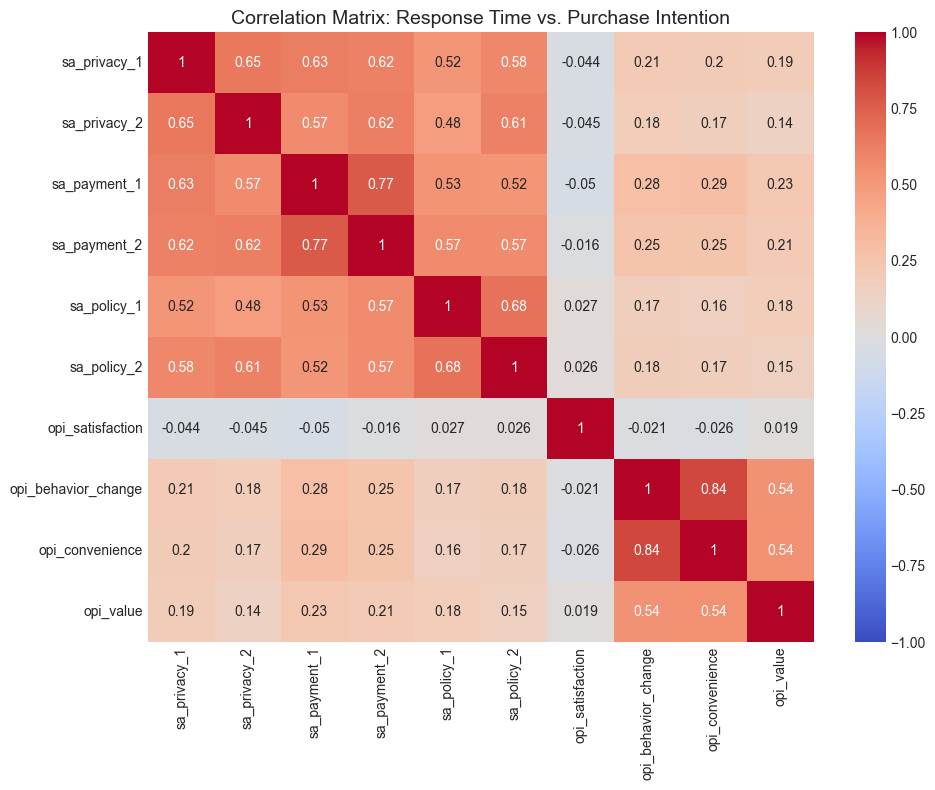

In [8]:
#Display basic statistics for social influence and purchase intention variables
print("\nBasic statistics for social influence  variables:")
print(df[structural_assuarance_cols].describe())

print("\nBasic statistics for purchase intention variables:")
print(df[intention_cols].describe())

# Create a correlation matrix for social influence  and purchase intention variables
corr_matrix = df[structural_assuarance_cols + intention_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Response Time vs. Purchase Intention')
plt.tight_layout()
plt.show()

# Create a composite social influence  score (average of both social influence  variables)
df['response_time_score'] = df[structural_assuarance_cols].mean(axis=1)

# Create a composite purchase intention score (average of intention variables)
df['purchase_intention_score'] = df[intention_cols].mean(axis=1)



## 5. Hypothesis Testing

### 5.1 Pearson Correlation Test



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Define column names for Structural Assurance (SA) and Intention to Purchase Online (IPO)
structural_assuarance_cols = ['sa_privacy_1', 'sa_privacy_2','sa_payment_1', 'sa_payment_2', 'sa_policy_1', 'sa_policy_2']
intention_cols = ['opi_satisfaction', 'opi_behavior_change', 'opi_convenience', 'opi_value']

# Simulate survey data (replace with actual data if available)
np.random.seed(42)
n_respondents = 200
data = {
    **{col: np.random.randint(1, 6, n_respondents) for col in structural_assurance_cols},
    **{col: np.random.randint(1, 6, n_respondents) for col in intention_cols}
}
df = pd.DataFrame(data)

# Compute composite scores
df['Structural_Assurance'] = df[structural_assurance_cols].mean(axis=1)
df['Intention_Purchase_Online'] = df[intention_cols].mean(axis=1)

# Perform simple linear regression
X = df['Structural_Assurance'].values.reshape(-1, 1)
y = df['Intention_Purchase_Online']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nSimple Linear Regression Results:")
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Create a more detailed model using statsmodels for better statistical insights
X_with_const = sm.add_constant(df['Structural_Assurance'])
sm_model = sm.OLS(df['Intention_Purchase_Online'], X_with_const).fit()

print("\nDetailed Regression Results:")
print(sm_model.summary())

# Interpret the results
print("\nRegression Interpretation:")
if sm_model.pvalues[1] < 0.05:
    print("The relationship between structural assurance and purchase intention is statistically significant.")
    print(f"For every 1-unit increase in structural assurance score, purchase intention increases by {sm_model.params[1]:.4f} units.")
    print("This suggests that higher structural assurance (e.g., better payment security, privacy protection) positively impacts purchase intention.")
    print("We reject the null hypothesis: Structural assurance has a significant impact on intention to purchase online.")
else:
    print("The relationship between structural assurance and purchase intention is not statistically significant.")
    print("We fail to reject the null hypothesis: No evidence that structural assurance impacts intention to purchase online.")

NameError: name 'structural_assurance_cols' is not defined